# Работа со статистическими данными (Население по району, Заработная плата по районам и тд и тп)

In [1]:
import pandas as pd
import numpy as np

# Загрузка датасета
df = pd.read_csv('Базовые_данные.csv')
df

,Населенный_пункт,Мужчины_Женщины,Мужчины,Женщины,Зарплата,Площадь района(км2)
0,Адмиралтейский район,158253,71702,86551,134590,13.82
1,Василеостровский район,209733,94259,115474,148492,16.70
2,Выборгский район,533808,239255,294553,131990,115.52
3,Калининский район,546908,245218,301690,145695,40.18
4,Кировский район,339946,154858,185088,129717,47.46
5,Колпинский район,183947,82693,101254,125218,102.25
6,Красногвардейский район,369347,163553,205794,126337,56.35
7,Красносельский район,426372,190072,236300,108531,90.49
8,Кронштадтский район,44399,20968,23431,108831,19.53
9,Курортный район,82713,38881,43832,118117,268.19


In [2]:
df.describe()

,Мужчины_Женщины,Мужчины,Женщины,Зарплата,Площадь района(км2)
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,311217.277778,140318.111111,170899.166667,132762.500000,79.779444
std,186681.774459,83402.968793,103338.121315,19151.415359,72.562515
min,44399.000000,20968.000000,23431.000000,108531.000000,13.820000
25%,164676.500000,74449.750000,90226.750000,118457.750000,24.035000
50%,297777.500000,134045.000000,160603.500000,128027.000000,58.505000
75%,423921.500000,188722.000000,235199.500000,147792.750000,105.872500
max,692753.000000,315024.000000,377729.000000,166640.000000,268.190000


## Гипотеза: От плотности населения в определенном районе зависит ее платежоспособность.

# Проведем базовую аналитику

In [3]:
# Районы с наибольшим преобладанием женщин:

df['Мужчины_%'] = (df['Мужчины'] / df['Мужчины_Женщины'] * 100).round(2)
df['Женщины_%'] = (df['Женщины'] / df['Мужчины_Женщины'] * 100).round(2)
df['Соотношение_М_Ж'] = (df['Мужчины'] / df['Женщины']).round(3)
print("Районы с наибольшим преобладанием женщин:")
print(df.sort_values('Женщины_%', ascending=False)[['Населенный_пункт', 'Женщины_%', 'Мужчины_%', 'Соотношение_М_Ж']].head())

Районы с наибольшим преобладанием женщин:
           Населенный_пункт  Женщины_%  Мужчины_%  Соотношение_М_Ж
10         Московский район      56.32      43.68            0.776
6   Красногвардейский район      55.72      44.28            0.795
16        Фрунзенский район      55.67      44.33            0.796
7      Красносельский район      55.42      44.58            0.804
17        Центральный район      55.26      44.74            0.809


In [4]:
# Районы с наибольшим преобладанием мужчин:

df['Мужчины_%'] = (df['Мужчины'] / df['Мужчины_Женщины'] * 100).round(2)
df['Женщины_%'] = (df['Женщины'] / df['Мужчины_Женщины'] * 100).round(2)
df['Соотношение_Ж_М'] = (df['Женщины'] / df['Мужчины']).round(3)
print("Районы с наибольшим преобладанием мужчин:")
print(df.sort_values('Мужчины_%', ascending=False)[['Населенный_пункт', 'Женщины_%', 'Мужчины_%', 'Соотношение_Ж_М']].head())

Районы с наибольшим преобладанием мужчин:
        Населенный_пункт  Женщины_%  Мужчины_%  Соотношение_Ж_М
12   Петроградский район      51.40      48.60            1.058
8    Кронштадтский район      52.77      47.23            1.117
9        Курортный район      52.99      47.01            1.127
15      Пушкинский район      53.25      46.75            1.139
13  Петродворцовый район      53.31      46.69            1.142


In [5]:
# Учитывая, нижеследующие данные по населению, можно провести градацию
#min	44399.000000
#25%	164676.500000 < малый
#50%	297777.500000 средний
#75%	423921.500000 > крупный
#max	692753.000000

df['Категория_населения'] = pd.cut(df['Мужчины_Женщины'],
                                   bins=[0, 164676, 423921, 692753],
                                   labels=['Маленький', 'Средний', 'Крупный'])
df

,Населенный_пункт,Мужчины_Женщины,Мужчины,Женщины,Зарплата,Площадь района(км2),Мужчины_%,Женщины_%,Соотношение_М_Ж,Соотношение_Ж_М,Категория_населения
0,Адмиралтейский район,158253,71702,86551,134590,13.82,45.31,54.69,0.828,1.207,Маленький
1,Василеостровский район,209733,94259,115474,148492,16.70,44.94,55.06,0.816,1.225,Средний
2,Выборгский район,533808,239255,294553,131990,115.52,44.82,55.18,0.812,1.231,Крупный
3,Калининский район,546908,245218,301690,145695,40.18,44.84,55.16,0.813,1.230,Крупный
4,Кировский район,339946,154858,185088,129717,47.46,45.55,54.45,0.837,1.195,Средний
5,Колпинский район,183947,82693,101254,125218,102.25,44.95,55.05,0.817,1.224,Средний
6,Красногвардейский район,369347,163553,205794,126337,56.35,44.28,55.72,0.795,1.258,Средний
7,Красносельский район,426372,190072,236300,108531,90.49,44.58,55.42,0.804,1.243,Крупный
8,Кронштадтский район,44399,20968,23431,108831,19.53,47.23,52.77,0.895,1.117,Маленький
9,Курортный район,82713,38881,43832,118117,268.19,47.01,52.99,0.887,1.127,Маленький


In [6]:
# расчет плотности населения районов для проверкаи гипотезы

df['Площадь_км2'] = df['Площадь района(км2)']
df['Плотность_населения'] = (df['Мужчины_Женщины'] / df['Площадь_км2']).round(2)

print("Расчет плотности населения районов:")
print(df[['Населенный_пункт', 'Мужчины_Женщины', 'Площадь_км2', 'Плотность_населения', 'Зарплата']].sort_values('Плотность_населения', ascending=False).head(10))

Расчет плотности населения районов:
           Населенный_пункт  Мужчины_Женщины  Площадь_км2  \
3         Калининский район           546908        40.18   
1    Василеостровский район           209733        16.70   
17        Центральный район           203870        17.77   
0      Адмиралтейский район           158253        13.82   
16        Фрунзенский район           416570        37.52   
11            Невский район           546475        60.66   
4           Кировский район           339946        47.46   
6   Красногвардейский район           369347        56.35   
14         Приморский район           692753       109.90   
12      Петроградский район           117003        19.54   

    Плотность_населения  Зарплата  
3              13611.45    145695  
1              12558.86    148492  
17             11472.71    159976  
0              11451.01    134590  
16             11102.61    119480  
11              9008.82    120834  
4               7162.79    129717  
6   

Корреляция между показателями:
                 Мужчины_Женщины   Мужчины   Женщины  Зарплата
Мужчины_Женщины         1.000000  0.999606  0.999744  0.245209
Мужчины                 0.999606  1.000000  0.998715  0.245064
Женщины                 0.999744  0.998715  1.000000  0.245186
Зарплата                0.245209  0.245064  0.245186  1.000000


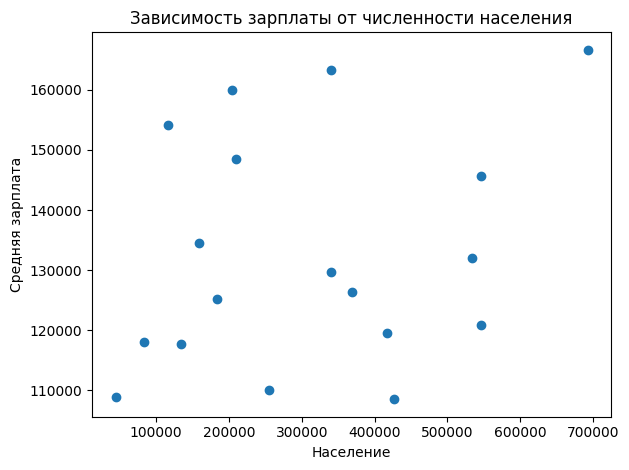

In [7]:
# Проведем анализ зависимости зарплаты от численности населения (Гипотеза 1)

import matplotlib.pyplot as plt

# Расчет на душу населения
df['Зарплата_на_душу'] = df['Зарплата']

# Корреляционный анализ
correlation_matrix = df[['Мужчины_Женщины', 'Мужчины', 'Женщины', 'Зарплата']].corr()
print("Корреляция между показателями:")
print(correlation_matrix)

plt.scatter(df['Мужчины_Женщины'], df['Зарплата'])
plt.xlabel('Население')
plt.ylabel('Средняя зарплата')
plt.title('Зависимость зарплаты от численности населения')
plt.tight_layout()
plt.show()

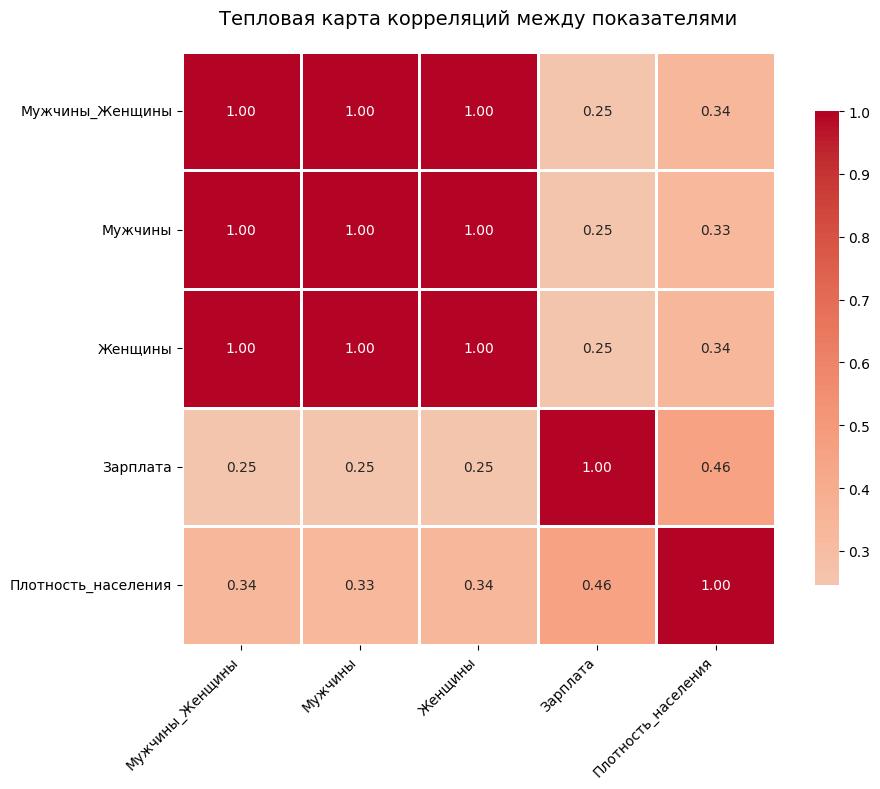

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr_matrix = df[['Мужчины_Женщины', 'Мужчины', 'Женщины', 'Зарплата', 'Плотность_населения']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8})

plt.title('Тепловая карта корреляций между показателями', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Коэффициент корреляции между плотностью и зарплатой: 0.46

ПОЛОЖИТЕЛЬНАЯ корреляция: чем выше плотность, тем выше зарплата

## Проведем кластеризацию

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5, init='k-means++', n_init='auto', random_state=1, verbose=1)

In [10]:
features_for_clustering = ['Зарплата', 'Плотность_населения']
X = df[features_for_clustering]

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
model.fit(X)

Initialization complete
Iteration 0, inertia 721494212.5737001.
Iteration 1, inertia 436816029.5050278.
Iteration 2, inertia 372507151.88236046.
Iteration 3, inertia 331185599.6184667.
Converged at iteration 3: strict convergence.


KMeans(n_clusters=5, random_state=1, verbose=1)

In [13]:
labels = model.predict(X)

In [14]:
df['Cluster'] = labels
colors =['red', 'green', 'orange', 'purple', 'blue']

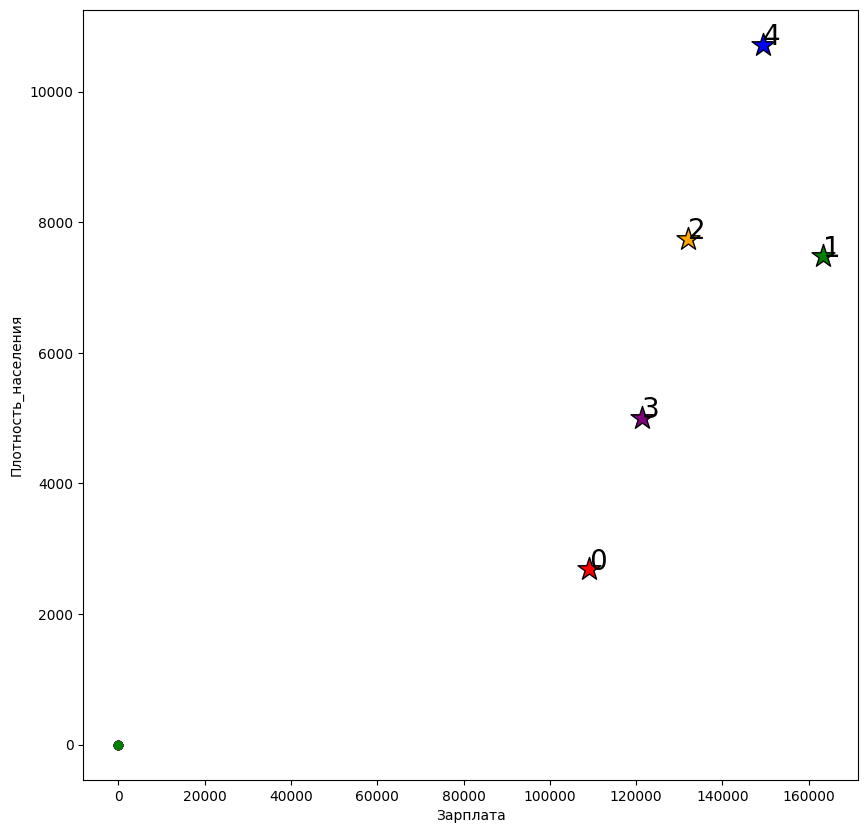

In [15]:
plt.figure(figsize=(10, 10))

for i in range(len(labels)):
    plt.scatter(X_scaled[i, 0], X_scaled[i, 1], color=colors[labels[i]])

for i, center in enumerate(model.cluster_centers_):
    plt.scatter(center[0], center[1], marker='*', s=300, c=colors[i], edgecolor='black')
    plt.text(center[0]-0.1, center[1]-0.2, f'{i}', fontsize=20);

    plt.xlabel('Зарплата')
    plt.ylabel('Плотность_населения')

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Подготовка данных для кластеризации
X = df[['Мужчины_Женщины', 'Соотношение_М_Ж', 'Зарплата', 'Плотность_населения']].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Кластеризация K-means
kmeans = KMeans(n_clusters=5, random_state=1)
df['Кластер'] = kmeans.fit_predict(X_scaled)

print("Распределение районов по кластерам:")
print(df['Кластер'].value_counts())

Распределение районов по кластерам:
Кластер
0    6
1    5
2    4
3    2
4    1
Name: count, dtype: int64


In [17]:
# Опредление правильных границ значений для характеристик кластеров

# Средние значения по всем 18 районам:
avg_density = df['Плотность_населения'].mean()
avg_salary = df['Зарплата'].mean()

# Стандартные отклонения:
std_density = df['Плотность_населения'].std()
std_salary = df['Зарплата'].std()

print(f" Среднее по плотности: {avg_density:,.0f} чел/км²")
print(f" Стандартное отклонение: {std_density:,.0f} чел/км²")

print(f"\nСреднее по зарплате: {avg_salary:,.0f} руб.")
print(f"Стандартное отклонение: {std_salary:,.0f} руб.")

# Границы классификации
print(f"\nОЧЕНЬ ВЫСОКАЯ плотность: > {avg_density + std_density:,.0f} чел/км")
print(f"ВЫСОКАЯ плотность: {avg_density:,.0f} - {avg_density + std_density:,.0f} чел/км")
print(f"СРЕДНЯЯ плотность: {avg_density - std_density:,.0f} - {avg_density:,.0f} чел/км")
print(f"НИЗКАЯ плотность: < {avg_density - std_density:,.0f} чел/км")
print(f"\nВЫСОКАЯ зарплата: > {avg_salary + std_salary:,.0f} руб.")
print(f"ВЫШЕ СРЕДНЕЙ зарплата: {avg_salary:,.0f} - {avg_salary + std_salary:,.0f} руб.")
print(f"СРЕДНЯЯ зарплата: {avg_salary - std_salary:,.0f} - {avg_salary:,.0f} руб.")
print(f"НИЗКАЯ зарплата: < {avg_salary - std_salary:,.0f} руб.")

 Среднее по плотности: 6,439 чел/км²
 Стандартное отклонение: 4,272 чел/км²

Среднее по зарплате: 132,762 руб.
Стандартное отклонение: 19,151 руб.

ОЧЕНЬ ВЫСОКАЯ плотность: > 10,710 чел/км²
ВЫСОКАЯ плотность: 6,439 - 10,710 чел/км²
СРЕДНЯЯ плотность: 2,167 - 6,439 чел/км²
НИЗКАЯ плотность: < 2,167 чел/км²

ВЫСОКАЯ зарплата: > 151,914 руб.
ВЫШЕ СРЕДНЕЙ зарплата: 132,762 - 151,914 руб.
СРЕДНЯЯ зарплата: 113,611 - 132,762 руб.
НИЗКАЯ зарплата: < 113,611 руб.


In [18]:
import pandas as pd

# Детальная характеристика кластеров

# Функции для классификации
def classify_density(value):
    if value > avg_density + std_density:
        return "ОЧЕНЬ ВЫСОКАЯ"
    elif value > avg_density:
        return "ВЫСОКАЯ"
    elif value > avg_density - std_density:
        return "СРЕДНЯЯ"
    else:
        return "НИЗКАЯ"

def classify_salary(value):
    if value > avg_salary + std_salary:
        return "ВЫСОКАЯ"
    elif value > avg_salary:
        return "ВЫШЕ СРЕДНЕЙ"
    elif value > avg_salary - std_salary:
        return "СРЕДНЯЯ"
    else:
        return "НИЗКАЯ"

# Создаем списки для хранения данных кластеров
clusters_summary = []
clusters_details = []

# Анализируем каждый кластер
for cluster in sorted(df['Кластер'].unique()):
    cluster_data = df[df['Кластер'] == cluster]
    cluster_size = len(cluster_data)

    density = cluster_data['Плотность_населения'].mean()
    salary = cluster_data['Зарплата'].mean()
    population = cluster_data['Мужчины_Женщины'].mean()
    gender_ratio = cluster_data['Соотношение_М_Ж'].mean()

    # Классификация
    density_class = classify_density(density)
    salary_class = classify_salary(salary)

    # Определяем тип кластера
    if density_class == "ОЧЕНЬ ВЫСОКАЯ" and salary_class in ["ВЫСОКАЯ", "ВЫШЕ СРЕДНЕЙ"]:
        cluster_type = "ПРИОРИТЕТНЫЕ РАЙОНЫ"
    elif density_class == "ВЫСОКАЯ" and salary_class == "ВЫСОКАЯ":
        cluster_type = "ФОКУСНЫЕ РАЙОНЫ"
    elif density_class == "ВЫСОКАЯ" and salary_class in ["СРЕДНЯЯ", "НИЗКАЯ"]:
        cluster_type = "МАССОВЫЕ РАЙОНЫ"
    elif density_class in ["СРЕДНЯЯ", "НИЗКАЯ"] and salary_class == "ВЫСОКАЯ":
        cluster_type = "НИШЕВЫЕ РАЙОНЫ"
    elif density_class == "НИЗКАЯ" and salary_class == "НИЗКАЯ":
        cluster_type = "ЭКОНОМ РАЙОНЫ"
    else:
        cluster_type = "СМЕШАННЫЙ ТИП"

    # Сохраняем сводную информацию по кластеру
    clusters_summary.append({
        'Кластер': cluster,
        'Тип_кластера': cluster_type,
        'Количество_районов': cluster_size,
        'Доля_от_общего_числа_%': cluster_size/len(df)*100,
        'Средняя_плотность': density,
        'Класс_плотности': density_class,
        'Отклонение_плотности_%': (density - avg_density)/avg_density*100,
        'Средняя_зарплата': salary,
        'Класс_зарплаты': salary_class,
        'Отклонение_зарплаты_%': (salary - avg_salary)/avg_salary*100,
        'Среднее_население': population,
        'Соотношение_М_Ж': gender_ratio
    })

    # Сохраняем детальную информацию по каждому району в кластере
    for idx, (_, row) in enumerate(cluster_data.iterrows(), 1):
        density_dev = (row['Плотность_населения'] - avg_density) / avg_density * 100
        salary_dev = (row['Зарплата'] - avg_salary) / avg_salary * 100

        clusters_details.append({
            'Кластер': cluster,
            'Тип_кластера': cluster_type,
            'Порядковый_номер_в_кластере': idx,
            'Населенный_пункт': row['Населенный_пункт'],
            'Плотность_населения': row['Плотность_населения'],
            'Отклонение_плотности_%': density_dev,
            'Зарплата': row['Зарплата'],
            'Отклонение_зарплаты_%': salary_dev,
            'Население': row['Мужчины_Женщины'],
            'Соотношение_М_Ж': row['Соотношение_М_Ж']
        })

    # Вывод в консоль (сохраняем оригинальную логику)
    print(f"КЛАСТЕР {cluster} ({cluster_size} районов, {cluster_size/len(df)*100:.0f}%)")
    print(f"ТИП: {cluster_type}")

    # Показатели кластера
    print(f"\nОСНОВНЫЕ ПОКАЗАТЕЛИ:")
    print(f"Плотность: {density:,.0f} чел/км² → {density_class}")
    print(f"(отклонение от среднего: {(density - avg_density)/avg_density*100:+.1f}%)")
    print(f"Зарплата: {salary:,.0f} руб. → {salary_class}")
    print(f"(отклонение от среднего: {(salary - avg_salary)/avg_salary*100:+.1f}%)")
    print(f"Среднее население: {population:,.0f} чел.")
    print(f"Соотношение М/Ж: {gender_ratio:.2f}")

    # Список районов в кластере
    print(f"\nРАЙОНЫ В КЛАСТЕРЕ:")
    for idx, (_, row) in enumerate(cluster_data.iterrows(), 1):
        density_dev = (row['Плотность_населения'] - avg_density) / avg_density * 100
        salary_dev = (row['Зарплата'] - avg_salary) / avg_salary * 100

        print(f"{idx}. {row['Населенный_пункт']}")
        print(f"Плотность: {row['Плотность_населения']:,.0f} чел/км² ({density_dev:+.1f}%)")
        print(f"Зарплата: {row['Зарплата']:,.0f} руб. ({salary_dev:+.1f}%)")
        print(f"Население: {row['Мужчины_Женщины']:,.0f} чел.")

    print()

КЛАСТЕР 0 (6 районов, 33%)
ТИП: МАССОВЫЕ РАЙОНЫ

ОСНОВНЫЕ ПОКАЗАТЕЛИ:
Плотность: 7,194 чел/км² → ВЫСОКАЯ
(отклонение от среднего: +11.7%)
Зарплата: 122,815 руб. → СРЕДНЯЯ
(отклонение от среднего: -7.5%)
Среднее население: 438,753 чел.
Соотношение М/Ж: 0.81

РАЙОНЫ В КЛАСТЕРЕ:
1. Выборгский район
Плотность: 4,621 чел/км² (-28.2%)
Зарплата: 131,990 руб. (-0.6%)
Население: 533,808 чел.
2. Кировский район
Плотность: 7,163 чел/км² (+11.2%)
Зарплата: 129,717 руб. (-2.3%)
Население: 339,946 чел.
3. Красногвардейский район
Плотность: 6,555 чел/км² (+1.8%)
Зарплата: 126,337 руб. (-4.8%)
Население: 369,347 чел.
4. Красносельский район
Плотность: 4,712 чел/км² (-26.8%)
Зарплата: 108,531 руб. (-18.3%)
Население: 426,372 чел.
5. Невский район
Плотность: 9,009 чел/км² (+39.9%)
Зарплата: 120,834 руб. (-9.0%)
Население: 546,475 чел.
6. Фрунзенский район
Плотность: 11,103 чел/км² (+72.4%)
Зарплата: 119,480 руб. (-10.0%)
Население: 416,570 чел.

КЛАСТЕР 1 (5 районов, 28%)
ТИП: СМЕШАННЫЙ ТИП

ОСНОВНЫЕ ПО

In [ ]:
# Создадим датафрейм из данных выше для экспорта, использования в аналитике и вывода на дашборд

summary_df = pd.DataFrame(clusters_summary)
details_df = pd.DataFrame(clusters_details)

# Экспортируем в CSV файлы
summary_df.to_csv('clusters_data.csv', index=False, encoding='utf-8-sig')
details_df.to_csv('details_byregions.csv', index=False, encoding='utf-8-sig')

# Также можно создать объединенный файл со всей информацией
merged_df = pd.merge(
    details_df,
    summary_df[['Кластер', 'Средняя_плотность', 'Класс_плотности',
                'Средняя_зарплата', 'Класс_зарплаты', 'Тип_кластера']],
    on='Кластер',
    suffixes=('_района', '_кластера')
)

merged_df.to_csv('full_cluster_analysis.csv', index=False, encoding='utf-8-sig')

print("Готово:)")

## Существует взаимосвязь между плотностью населения и ее платежеспособностью в районах Санкт-Петербурга.

Анализ взаимосвязи плотности населения и уровня заработной платы в районах Санкт-Петербурга:

Результат:
Проведенное исследование позволило выявить положительную корреляцию между плотностью населения и уровнем заработной платы в районах Санкт-Петербурга. Коэффициент корреляции составил 0.46, что свидетельствует о наличии умеренной положительной взаимосвязи: районы с более высокой плотностью населения, как правило, характеризуются более высокими средними заработными платами.

Было бы уместо сделать акцент на кластерном анализе:
С помощью метода K-means кластеризации были выделены 5 характерных кластеров районов:

1) ПРИОРИТЕТНЫЕ РАЙОНЫ (кластер 2 - 22% районов)
ОЧЕНЬ ВЫСОКАЯ плотность + ВЫШЕ СРЕДНЕЙ/ВЫСОКАЯ зарплата

Адмиралтейский, Василеостровский, Калининский, Центральный районы.

Этот кластер представляет районы с максимальной демографической концентрацией (средняя плотность 12 274 чел/км²) и одновременно с высоким экономическим потенциалом (средняя зарплата 147 188 руб.). Сочетание данной плотности с доходностью населения делает эти районы наиболее привлекательными для бизнеса.
Особенностью кластера является то, что, несмотря на очень высокую плотность, зарплата здесь классифицируется лишь как "выше средней" (а не "высокая").

2) МАССОВЫЕ РАЙОНЫ (кластер 0 - 33% районов)
ВЫСОКАЯ плотность + СРЕДНЯЯ/НИЗКАЯ зарплата

Выборгский, Кировский, Красногвардейский, Красносельский, Невский, Фрунзенский районы.

Крупнейший по численности кластер демонстрирует классический парадокс: высокая плотность населения (7 194 чел/км²) сочетается со средней зарплатой (122 815 руб.). Этот диссонанс объясняет, почему общая корреляция между плотностью и зарплатой составляет лишь 0.46.
Данные районы представляют собой типичные спальные районы с развитой жилой застройкой, но ограниченным количеством высокооплачиваемых рабочих мест. Население этих районов может работать в центральных районах, но проживать здесь из-за более доступного жилья.
Для бизнеса это кластер массового спроса с умеренной платежеспособностью.

3) НИШЕВЫЕ РАЙОНЫ (кластеры 3 и 4 - 17% районов)
СРЕДНЯЯ плотность + ВЫСОКАЯ зарплата

Московский, Приморский, Петроградский районы.

Районы со средней плотностью населения (5 480-5 988 чел/км²) демонстрируют самую высокую заработную плату (154 086-164 986 руб).
Фактически, это районы с наиболее эффективным сочетанием демографических и экономических показателей: относительно комфортная плотность заселения сочетается с максимальной доходностью населения.
Для бизнеса эти районы могут быть даже более привлекательными, чем "приоритетные".

5) СМЕШАННЫЙ ТИП (кластер 1 - 28% районов)

НИЗКАЯ плотность + СРЕДНЯЯ зарплата

Колпинский, Кронштадтский, Курортный, Петродворцовый, Пушкинский районы.

Данный кластер объединяет преимущественно периферийные районы с минимальной плотностью населения (1 339 чел/км²) и умеренными доходами (116 005 руб). Низкая плотность объясняется как значительной площадью районов (включая лесопарковые зоны, водные пространства), так и менее интенсивной жилой застройкой.
При этом зарплата, хотя и ниже среднего по городу, не опускается до уровня "низкой", что может указывать на наличие локальных промышленных предприятий или бюджетных учреждений.
Для бизнеса это кластер требует специализированных подходов, учитывающих низкую плотность и рассредоточенность населения.

Гипотеза о зависимости платежеспособности от плотности населения имеет право получить частичное подтверждение:

Существует положительная корреляция (r=0,46), но она имеет умеренный характер, что указывает на сложность изучаемых показателей.

Кластерный анализ выявил нелинейность зависимости:

Максимальные зарплаты наблюдаются не в районах с максимальной плотностью ("Приоритетные районы"), а в районах со средней плотностью ("Нишевые районы").
Высокая плотность может сочетаться как с доходностью выше среднего ("Приоритетные районы"), так и со средней доходностью ("Массовые районы").

Вывод:
Плотность населения является значимым, но не единственным фактором, определяющим уровень заработной платы в районах Санкт-Петербурга.
Результаты исследования подтверждают необходимость комплексного подхода к анализу.